In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.fftpack import fft, fftfreq
from scipy.io import loadmat
import xlsxwriter 
%matplotlib inline
import import_ipynb
import functions_NGD
import random
import os
os.chdir('F:/我的雲端硬碟/Retina exp/python code/functions')
import import_ipynb
import NGDfunc
import pandas as pd
import glob

importing Jupyter notebook from functions_NGD.ipynb
importing Jupyter notebook from NGDfunc.ipynb


In [2]:
selected_channel=8

## load stimulus and spikes from mat files

0 diode_OU_tau=500ms_cutoff=0_mean10_amp2_20-Jul-2021_0.mat
1 diode_OU_tau=500ms_cutoff=1_coeff=0.2_20-Jul-2021_0.mat
2 diode_OU_tau=500ms_cutoff=1_coeff=0.6_20-Jul-2021_0.mat
3 diode_OU_tau=500ms_cutoff=1_coeff=1.3_20-Jul-2021_0.mat
4 diode_OU_tau=500ms_cutoff=1_mean10_amp2_20-Jul-2021_0.mat
5 diode_OU_tau=500ms_cutoff=1_mean=10_amp=0.5_20-Jul-2021_0.mat
6 diode_OU_tau=500ms_cutoff=1_mean=10_amp=1.5_20-Jul-2021_0.mat
7 diode_OU_tau=500ms_cutoff=1_mean=10_amp=1_20-Jul-2021_0.mat
8 diode_OU_tau=500ms_cutoff=1_mean=10_amp=3_20-Jul-2021_0.mat
9 diode_WhiteNoise_mean=10_amp=0.5_20-Jul-2021_0.mat
10 diode_WhiteNoise_mean=10_amp=1.5_20-Jul-2021_0.mat
11 diode_WhiteNoise_mean=10_amp=1_20-Jul-2021_0.mat
12 diode_WhiteNoise_mean=10_amp=2_20-Jul-2021_0.mat
13 diode_WhiteNoise_mean=10_amp=3_20-Jul-2021_0.mat


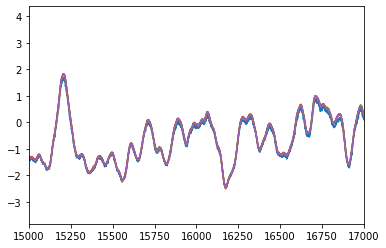

(10000, 11000)

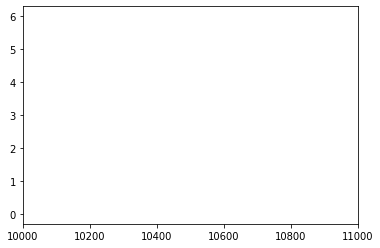

In [3]:
os.chdir('F:/我的雲端硬碟/Retina exp/exp data/Spatial stimuli/20210720/SplitData')
mat_files=[i for i in glob.glob('*.mat')] # get file name in a directory
mat_files=sorted(mat_files) # sort file sequence by name
for i in range(len(mat_files)):
    print(i,mat_files[i])
selected_files=[5,7,6,4,8]

BinSpikes_set=[[] for k in range(np.size(selected_files,0))]
sti_set=[[] for k in range(np.size(selected_files,0))] 
dt=0.01
for i in range(np.size(selected_files,0)):
    data1=loadmat(mat_files[selected_files[i]])
    spikes=data1['Spikes'][0][selected_channel][0]
    timestamp=data1['TimeStamps'][0]

    adata1=data1['a_data'][0]
    t=np.arange(1,len(adata1)+1e-5)/20000
    sti=adata1[(t>timestamp[0]) & (t<timestamp[1])][0:-1:200]
    sti=sti-np.mean(sti)
    sti_set[i]=sti/np.std(sti)

    spikes1=spikes[(spikes>timestamp[0]) & (spikes<timestamp[1])]-timestamp[0]
    BinningTime=np.arange(0,timestamp[1]-timestamp[0],0.05)
    BinSpikes_set[i], bin_edges=np.histogram(spikes1,bins=BinningTime)
    
x_set=sti_set
time=np.linspace(dt,300,np.size(x_set[1]))
for i in range(len(x_set)):
    plt.plot(x_set[i])
plt.xlim(15000,17000)
plt.show()
for i in range(len(BinSpikes_set)):
    plt.plot(BinSpikes_set[i])
plt.xlim(10000,11000)

## load white noise STA as kernel

0 diode_OU_tau=500ms_cutoff=1_coeff=0.2_20-Jul-2021_0_MI.mat
1 diode_OU_tau=500ms_cutoff=1_coeff=0.6_20-Jul-2021_0_MI.mat
2 diode_OU_tau=500ms_cutoff=1_coeff=1.3_20-Jul-2021_0_MI.mat
3 diode_OU_tau=500ms_cutoff=1_mean10_amp2_20-Jul-2021_0_MI.mat
4 diode_OU_tau=500ms_cutoff=1_mean10_amp2_20-Jul-2021_0_STA.mat
5 diode_OU_tau=500ms_cutoff=1_mean=10_amp=0.5_20-Jul-2021_0_MI.mat
6 diode_OU_tau=500ms_cutoff=1_mean=10_amp=0.5_20-Jul-2021_0_STA.mat
7 diode_OU_tau=500ms_cutoff=1_mean=10_amp=1.5_20-Jul-2021_0_MI.mat
8 diode_OU_tau=500ms_cutoff=1_mean=10_amp=1.5_20-Jul-2021_0_STA.mat
9 diode_OU_tau=500ms_cutoff=1_mean=10_amp=1_20-Jul-2021_0_MI.mat
10 diode_OU_tau=500ms_cutoff=1_mean=10_amp=1_20-Jul-2021_0_STA.mat
11 diode_OU_tau=500ms_cutoff=1_mean=10_amp=3_20-Jul-2021_0_MI.mat
12 diode_OU_tau=500ms_cutoff=1_mean=10_amp=3_20-Jul-2021_0_STA.mat
13 diode_WhiteNoise_mean=10_amp=0.5_20-Jul-2021_0_MI.mat
14 diode_WhiteNoise_mean=10_amp=0.5_20-Jul-2021_0_STA.mat
15 diode_WhiteNoise_mean=10_amp=1.5_20-J

(-500, 0)

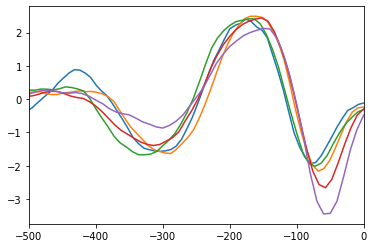

In [15]:
os.chdir('F:/我的雲端硬碟/Retina exp/exp data/Spatial stimuli/20210720/SplitData/MIandSTA')
mat_files_STA=[i for i in glob.glob('*.mat')]
mat_files_STA=sorted(mat_files_STA)
for i in range(len(mat_files_STA)):
    print(i,mat_files_STA[i])
selected_files_STA=[14,15,16,17,18]

STA_set=[[] for i in range(len(selected_files_STA))]
for i in range(np.size(selected_files_STA,0)):
    dataSTA=loadmat(mat_files_STA[selected_files_STA[i]])
    STA_set[i]=dataSTA['STAAAAA'][0][selected_channel][0]
    TS=dataSTA['TimeShift'][0][selected_channel][0]
aaa=[1,1.05,1.1,1.18,1.25]
bbb=aaa[::-1]
for i in range(np.size(selected_files_STA,0)):
    plt.plot(TS/bbb[i],STA_set[i])
plt.xlim(-500,0)

## kernels convolve with stimuli

In [5]:
def xcorr_quick(x,y,window_size):
    lags=np.arange(-int(window_size/dt),int(window_size/dt)+1e-5)
    lags=lags.astype(int)
    corr=np.zeros(len(lags))
    timelag=lags*dt
    for icorr in range(len(lags)):
        if lags[icorr]<0:
            corr[icorr]=np.sum(x[:lags[icorr]]*y[-lags[icorr]:])#/len(x[:-1+lags[icorr]])
        elif lags[icorr]==0:
            corr[icorr]=np.sum(x*y)#/len(x)
        else:
            corr[icorr]=np.sum(x[lags[icorr]:]*y[:-lags[icorr]])#/len(x[lags[icorr]:])
    return timelag,corr

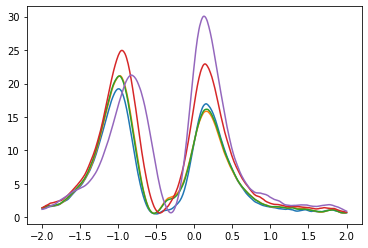

In [6]:
r_kernel=[[] for i in range(len(STA_set))]
for i in range(len(STA_set)):
    r_kernel[i]=np.convolve(x_set[-1],STA_set[i][::-1])
    r_kernel[i]=r_kernel[i][0:len(x_set[-1])]
    tl,MI=NGDfunc.MI(NGDfunc.EqualState(x_set[-1],8),NGDfunc.EqualState(r_kernel[i],8),0.01,[-2,2])
    plt.plot(tl,MI)
# plt.xlim(100,120)

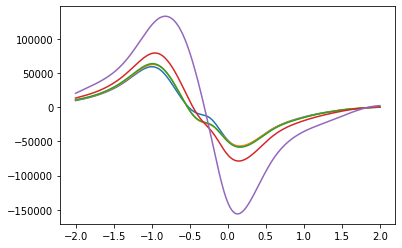

In [7]:
for i in range(len(STA_set)):
    tl_corr,xcorr=xcorr_quick(x_set[-1],r_kernel[i],2)
    plt.plot(tl_corr,xcorr)
plt.show()

In [8]:
# poisson as a function
def poisson(r_in,thr):
    rtemp=r_in-thr
    rtemp[rtemp>0]=0
    print(np.mean(rtemp))
    rtemp=rtemp*-2 #/np.mean(rtemp)*5 # let the mean firing rate as 5 hz
    tempspikes=np.zeros(len(rtemp))
    for step in range(len(rtemp)):
        if random.random()<rtemp[step]*dt:
            tempspikes[step]=1
        else:
            tempspikes[step]=0
    return tempspikes

-1.528257506057833
-1.5456329331229706
-1.577745382971664
-1.8323741803906726
-3.3055386400557625


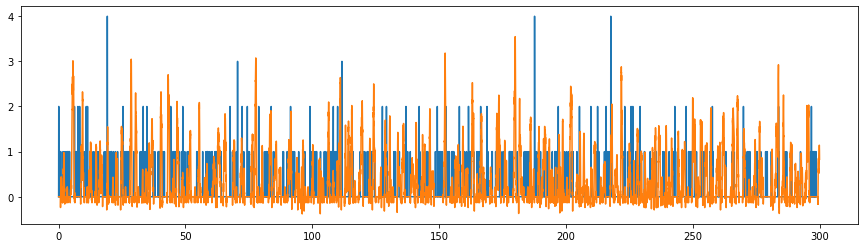

In [9]:
f1,ax1=plt.subplots(figsize=(15,4))
r_poisson=[[] for i in range(len(STA_set))]
for i in range(len(STA_set)):
    r_poisson[i]=poisson(r_kernel[i],0)
rs_poi=signal.savgol_filter(r_poisson[-1],51,3)*5
plt.plot(BinningTime[0:-1],BinSpikes_set[-1])
# plt.plot(time,r_poisson[-1],'.')
plt.plot(time,rs_poi)
# plt.xlim(100,200)

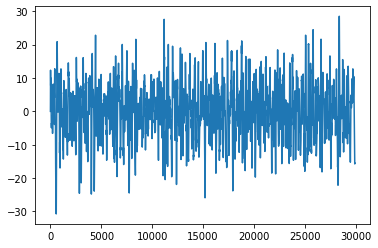

In [10]:
plt.plot(r_kernel[-1])